In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
from pprint import pprint

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/forecast?q=Atlanta&appid=08e5e0726d2dd6ba61dfc61132143db1&units=imperial"
# units = 'imperial'


# Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
response = requests.get(url).json()

pprint(response)

{'city': {'coord': {'lat': 33.749, 'lon': -84.388},
          'country': 'US',
          'id': 4180439,
          'name': 'Atlanta',
          'population': 420003,
          'sunrise': 1587207744,
          'sunset': 1587255042,
          'timezone': -14400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 18},
           'dt': 1587232800,
           'dt_txt': '2020-04-18 18:00:00',
           'main': {'feels_like': 57.4,
                    'grnd_level': 979,
                    'humidity': 24,
                    'pressure': 1016,
                    'sea_level': 1016,
                    'temp': 67.59,
                    'temp_kf': 0.26,
                    'temp_max': 67.59,
                    'temp_min': 67.12},
           'sys': {'pod': 'd'},
           'weather': [{'description': 'few clouds',
                        'icon': '02d',
                        'id': 801,
                        'main': 'Clouds'}],
           'wind': {'deg': 315, 'speed': 11.14}},
         

                    'temp_min': 56.05},
           'sys': {'pod': 'n'},
           'weather': [{'description': 'clear sky',
                        'icon': '01n',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 319, 'speed': 4}},
          {'clouds': {'all': 0},
           'dt': 1587546000,
           'dt_txt': '2020-04-22 09:00:00',
           'main': {'feels_like': 50.14,
                    'grnd_level': 981,
                    'humidity': 66,
                    'pressure': 1019,
                    'sea_level': 1019,
                    'temp': 53.56,
                    'temp_kf': 0,
                    'temp_max': 53.56,
                    'temp_min': 53.56},
           'sys': {'pod': 'n'},
           'weather': [{'description': 'clear sky',
                        'icon': '01n',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 314, 'speed': 3.02}},
          {'clou

In [4]:
##list.main.temp []
##list.rain []
##list.weather.Descrip []
##for measure in measures...pull dates
## try catch except for rain list append 0
date = []
temp = []
precip = []

##range =list(range(40))
##print(range)



In [5]:
for x in range(0,39):
    date.append(response['list'][x]['dt_txt'])
    #print(date)
    temp.append(response['list'][x]['main']['temp'])
    #print(temp)
    try:
        precip.append(response['list'][x]['rain']['3h'])
        #print(precip)
    except KeyError:
        precip.append(0)

In [6]:
print(temp)
print(precip)

[67.59, 68.25, 60.04, 54.97, 51.76, 50.2, 50.49, 56.8, 54.54, 55.4, 55.89, 57.27, 58.8, 58.39, 58.24, 65.95, 72.91, 71.73, 64.45, 58.82, 55.24, 52.77, 53.4, 67.19, 73.26, 72.63, 64.33, 58.28, 56.05, 53.56, 54.99, 66.87, 72.61, 73.2, 65.89, 63.52, 61.43, 61.18, 60.24]
[0, 0, 0, 0, 0, 0, 0, 0.63, 3.12, 0.86, 21.63, 9.77, 18.74, 0.99, 0.13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13, 1.02, 13.35]


In [7]:
forecast_dict = {
    "date": date,
    "temp": temp,
    "precipitation" : precip
}

df = pd.DataFrame(forecast_dict)
df

,date,temp,precipitation
0,2020-04-18 18:00:00,67.59,0.00
1,2020-04-18 21:00:00,68.25,0.00
2,2020-04-19 00:00:00,60.04,0.00
3,2020-04-19 03:00:00,54.97,0.00
4,2020-04-19 06:00:00,51.76,0.00
5,2020-04-19 09:00:00,50.20,0.00
6,2020-04-19 12:00:00,50.49,0.00
7,2020-04-19 15:00:00,56.80,0.63
8,2020-04-19 18:00:00,54.54,3.12
9,2020-04-19 21:00:00,55.40,0.86


In [8]:
# date is in UNIX format, convert to datetime
df['date'] = pd.to_datetime(df['date']) 

#datetime is in hours/seconds, use dt.date to remove hours
df['date'] = df['date'].dt.date

# converting report date to match format of weather data
#df['date'] = pd.to_datetime(df['date'])

df

,date,temp,precipitation
0,2020-04-18,67.59,0.00
1,2020-04-18,68.25,0.00
2,2020-04-19,60.04,0.00
3,2020-04-19,54.97,0.00
4,2020-04-19,51.76,0.00
5,2020-04-19,50.20,0.00
6,2020-04-19,50.49,0.00
7,2020-04-19,56.80,0.63
8,2020-04-19,54.54,3.12
9,2020-04-19,55.40,0.86


In [11]:
df.loc[df['precipitation'] > 0, 'rain'] = 1 
df.loc[df['precipitation'] == 0, 'rain'] = 0 

df 

,date,temp,precipitation,rain
0,2020-04-18,67.59,0.00,0.0
1,2020-04-18,68.25,0.00,0.0
2,2020-04-19,60.04,0.00,0.0
3,2020-04-19,54.97,0.00,0.0
4,2020-04-19,51.76,0.00,0.0
5,2020-04-19,50.20,0.00,0.0
6,2020-04-19,50.49,0.00,0.0
7,2020-04-19,56.80,0.63,1.0
8,2020-04-19,54.54,3.12,1.0
9,2020-04-19,55.40,0.86,1.0


In [19]:
prediction_df = df.groupby('date').mean().reset_index()
prediction_df

,date,temp,precipitation,rain
0,2020-04-18,67.92000,0.00000,0.000
1,2020-04-19,54.27500,0.57625,0.375
2,2020-04-20,62.39750,6.40750,0.625
3,2020-04-21,62.22000,0.00000,0.000
4,2020-04-22,62.48625,0.00000,0.000
5,2020-04-23,62.45200,2.90000,0.600


In [20]:
prediction_df['forecasted_crime'] = prediction_df['temp']*1.3 + prediction_df['rain']*10
prediction_df

,date,temp,precipitation,rain,forecasted_crime
0,2020-04-18,67.92000,0.00000,0.000,88.296000
1,2020-04-19,54.27500,0.57625,0.375,74.307500
2,2020-04-20,62.39750,6.40750,0.625,87.366750
3,2020-04-21,62.22000,0.00000,0.000,80.886000
4,2020-04-22,62.48625,0.00000,0.000,81.232125
5,2020-04-23,62.45200,2.90000,0.600,87.187600


In [29]:
prediction_df.to_csv('weather_prediction.csv')

AttributeError: module 'matplotlib.pyplot' has no attribute 'set'

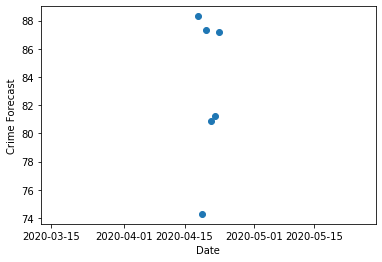

In [27]:
x_values = prediction_df['date']
y_values = prediction_df['forecasted_crime']
plt.scatter(x_values,y_values)
plt.xlabel('Date')
plt.ylabel('Crime Forecast')
plt.set(xlim = ('2020-04-05', '2020-04-31'))
plt.show()